# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [74]:
install.packages("magrittr")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message in install.packages("magrittr"):
“installation of package ‘magrittr’ had non-zero exit status”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [4]:

library(magrittr)
library(lazyeval)
library("ggplot2")

In [37]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")
head(weatherPraga,10)

STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
EZE00100082,1775,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",246.3,NA,246.3,E,⋯,NA,,NA,,10.55,E,13.64,E,7.46,E
EZE00100082,1776,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",114.6,NA,114.6,E,⋯,3481.8,E,NA,,8.53,E,11.72,E,5.34,E
EZE00100082,1777,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",62.6,NA,62.6,E,⋯,3628.0,E,NA,,8.67,E,11.76,E,5.58,E
EZE00100082,1778,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",188.4,NA,188.4,E,⋯,3330.2,E,NA,,9.91,E,13.17,E,6.65,E
EZE00100082,1779,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",109.5,NA,109.5,E,⋯,3216.0,E,NA,,10.23,E,13.64,E,6.82,E
EZE00100082,1780,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",94.5,NA,94.5,E,⋯,3344.6,E,NA,,8.64,E,11.93,E,5.34,E
EZE00100082,1781,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",310.3,NA,310.3,E,⋯,3356.6,E,NA,,10.08,E,13.22,E,6.95,E
EZE00100082,1782,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",211.7,NA,211.7,E,⋯,3494.6,E,NA,,8.84,E,11.91,E,5.77,E
EZE00100082,1783,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",190.8,NA,190.8,E,⋯,3359.6,E,NA,,9.98,E,13.12,E,6.84,E
EZE00100082,1784,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",196.4,NA,196.4,E,⋯,3906.3,E,NA,,8.16,E,11.46,E,4.87,E


In [110]:
summary(weatherPraga)

        STATION         DATE         LATITUDE       LONGITUDE       ELEVATION  
 EZE00100082:230   Min.   :1775   Min.   :50.09   Min.   :14.42   Min.   :191  
                   1st Qu.:1832   1st Qu.:50.09   1st Qu.:14.42   1st Qu.:191  
                   Median :1890   Median :50.09   Median :14.42   Median :191  
                   Mean   :1890   Mean   :50.09   Mean   :14.42   Mean   :191  
                   3rd Qu.:1947   3rd Qu.:50.09   3rd Qu.:14.42   3rd Qu.:191  
                   Max.   :2004   Max.   :50.09   Max.   :14.42   Max.   :191  
                                                                               
                    NAME          CDSD       CDSD_ATTRIBUTES      CLDD      
 PRAHA KLEMENTINUM, EZ:230   Min.   : 28.4   Mode:logical    Min.   : 28.4  
                             1st Qu.:114.6   NA's:230        1st Qu.:114.6  
                             Median :155.9                   Median :155.9  
                             Mean   :166.1          

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [111]:
dfweatherPraga <-weatherPraga[order(-weatherPraga$PRCP),]
topTenPrecipitation <- na.omit( dfweatherPraga$PRCP)
head(topTenPrecipitation,10)

[1] 745.5 665.4 661.5 638.3 637.3 634.9 633.1 625.7 624.1 622.4

* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

In [112]:
dfweatherPraga

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
165,EZE00100082,1939,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",185.7,NA,185.7,E,⋯,3152.4,E,745.5,",E",9.85,E,13.45,E,6.25,E
54,EZE00100082,1828,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",150.8,NA,150.8,E,⋯,3260.9,E,665.4,",E",9.94,E,13.25,E,6.62,E
228,EZE00100082,2002,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",308.2,NA,308.2,E,⋯,2749.8,E,661.5,",E",11.51,E,15.22,E,7.79,E
172,EZE00100082,1946,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",181.0,NA,181.0,E,⋯,3062.1,E,638.3,",E",9.70,E,13.78,E,5.62,E
116,EZE00100082,1890,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",116.3,NA,116.3,E,⋯,3535.5,E,637.3,",E",8.81,E,12.29,E,5.34,E
63,EZE00100082,1837,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",134.2,NA,134.2,E,⋯,3549.3,E,634.9,",E",8.23,E,11.30,E,5.16,E
184,EZE00100082,1958,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",132.3,NA,132.3,E,⋯,3431.3,E,633.1,",E",9.78,E,13.46,E,6.10,E
57,EZE00100082,1831,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",134.1,NA,134.1,E,⋯,3348.2,E,625.7,",E",9.66,E,12.88,E,6.44,E
192,EZE00100082,1966,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",139.1,NA,139.1,E,⋯,3167.7,E,624.1,",E",10.54,E,13.97,E,7.12,E
55,EZE00100082,1829,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",130.3,NA,130.3,E,⋯,3638.1,E,622.4,",E",7.33,E,10.77,E,3.88,E


In [113]:
dfWeatherPragaMin <- na.omit( weatherPraga[,c("DATE","EMNT")])
head(dfWeatherPragaMin,10)

DATE,EMNT
1775,-16.0
1776,-22.7
1777,-12.4
1778,-9.9
1779,-13.0
1780,-16.2
1781,-12.7
1782,-18.8
1783,-21.5
1784,-25.5



Call:
lm(formula = EMNT ~ DATE, data = dfWeatherPragaMin)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6098  -4.0003   0.5335   3.2636  11.2083 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -48.00664    9.17007  -5.235 3.74e-07 ***
DATE          0.01738    0.00485   3.582 0.000416 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 228 degrees of freedom
Multiple R-squared:  0.05329,	Adjusted R-squared:  0.04913 
F-statistic: 12.83 on 1 and 228 DF,  p-value: 0.0004162


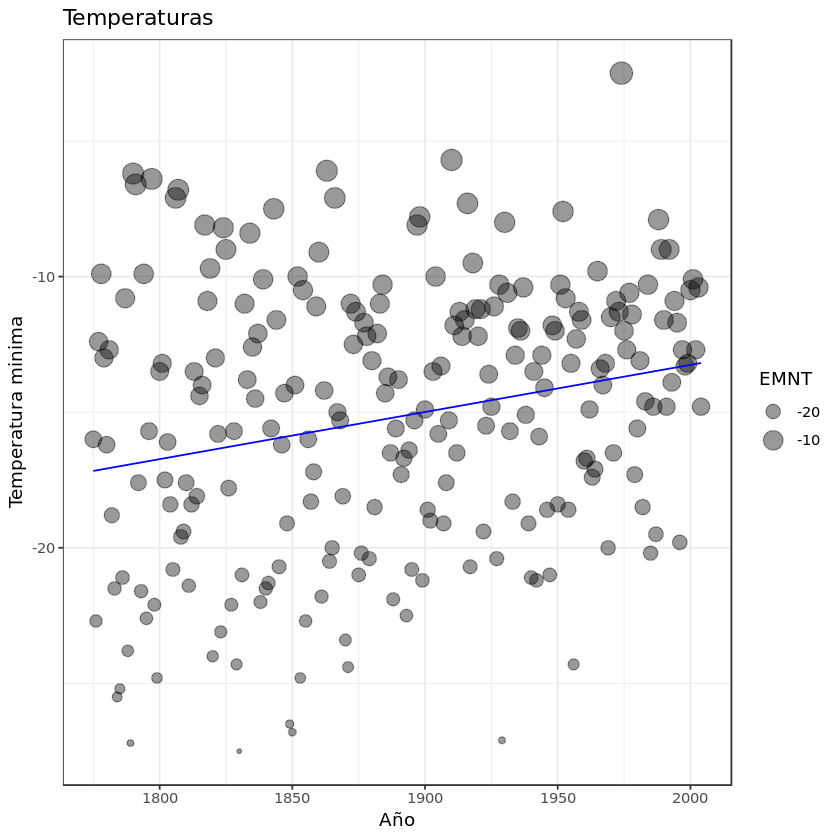

In [114]:

model <- lm(data=dfWeatherPragaMin, formula=EMNT~DATE)
summary(model)
dfWeatherPragaMin$predicted <- predict(model, dfWeatherPragaMin)

ggplot(data=dfWeatherPragaMin, aes(x=DATE))+
 geom_point(aes(y=EMNT, size=EMNT),alpha=0.4)+
 geom_line(aes(y=predicted),color="blue")+
 theme_bw()+xlab("Año")+ylab("Temperatura minima")+ggtitle("Temperaturas")

En la grafica superior podemos ver como aumenta 0.017 grados de media, el unico problema es que no es un estimador fiable dado que la R cuadrado  es de 0.04

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [94]:
weatherIntervalFirst <- dfWeatherPragaMin[which(dfWeatherPragaMin$DATE >= 1775 & dfWeatherPragaMin$DATE <= 1794),c('DATE', 'EMNT')]
weatherIntervalFirst <- na.omit(weatherIntervalFirst)
mean(weatherIntervalFirst$EMNT)

[1] -16.935

In [95]:
weatherIntervalSecond <- dfWeatherPragaMin[which(dfWeatherPragaMin$DATE >= 1985 & dfWeatherPragaMin$DATE <= 2004),c('DATE', 'EMNT')]
weatherIntervalSecond <- na.omit(weatherIntervalSecond)
mean(weatherIntervalSecond$EMNT)

[1] -13.04

La temperatura minima podemos ver como ha subido 3 grados entre esos periodos, para poder saber si es estadisticamente significativa deberíamos hacer una t-student para comparar las medias
Pasemos a ver si se cumplen los requisitos del test:

- Las poblaciones no están correladas. Esto ya no se cumple ya que al disminuir una variable o aumentar disminuye o aumenta linealmente.

Por lo tanto, el test estadistico no seria apto

## Datos banco mundial

Carga los datos del banco mundial

In [5]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [109]:
head(databank)

Country.Name,Country.Code,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,5.073000e+01,5.071500e+01,5.070000e+01,⋯,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01,NA,NA
Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,2.876100e+04,2.892400e+04,2.908200e+04,⋯,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04,NA,NA
Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,7.994038e-01,5.651398e-01,5.447726e-01,⋯,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02,NA,NA
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,5.669500e+04,5.703200e+04,5.736000e+04,⋯,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NA,NA
Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,8.324526e-01,5.926490e-01,5.734682e-01,⋯,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01,NA,NA
Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),SI.POV.DDAY,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
databankCodeIndicator <- databank
colnames(databankCodeIndicator)[colnames(databankCodeIndicator)=="Country.Name"] <- "Country_name"
colnames(databankCodeIndicator)[colnames(databankCodeIndicator)=="Country.Code"] <- "Country_code"
colnames(databankCodeIndicator)[colnames(databankCodeIndicator)=="Indicator.Name"] <- "Indicator_name"
colnames(databankCodeIndicator)[colnames(databankCodeIndicator)=="Indicator.Code"] <- "Indicator_code"
head(databankCodeIndicator)

Country_name,Country_code,Indicator_name,Indicator_code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,5.073000e+01,5.071500e+01,5.070000e+01,⋯,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01,NA,NA
Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,2.876100e+04,2.892400e+04,2.908200e+04,⋯,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04,NA,NA
Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,7.994038e-01,5.651398e-01,5.447726e-01,⋯,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02,NA,NA
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,5.669500e+04,5.703200e+04,5.736000e+04,⋯,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NA,NA
Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,8.324526e-01,5.926490e-01,5.734682e-01,⋯,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01,NA,NA
Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),SI.POV.DDAY,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [7]:
realCountryDataClean <- realCountryData$Country.Code
realCountryDataClean

[1] ABW AFG AGO ALB AND ARE ARG ARM ASM ATG AUS AUT AZE BDI BEL BEN BFA BGD
 [19] BGR BHR BHS BIH BLR BLZ BMU BOL BRA BRB BRN BTN BWA CAF CAN CHE CHI CHL
 [37] CHN CIV CMR COD COG COL COM CPV CRI CUB CUW CYM CYP CZE DEU DJI DMA DNK
 [55] DOM DZA ECU EGY ERI ESP EST ETH FIN FJI FRA FRO FSM GAB GBR GEO GHA GIB
 [73] GIN GMB GNB GNQ GRC GRD GRL GTM GUM GUY HKG HND HRV HTI HUN IDN IMN IND
 [91] IRL IRN IRQ ISL ISR ITA JAM JOR JPN KAZ KEN KGZ KHM KIR KNA KOR KWT LAO
[109] LBN LBR LBY LCA LIE LKA LSO LTU LUX LVA MAC MAF MAR MCO MDA MDG MDV MEX
[127] MHL MKD MLI MLT MMR MNE MNG MNP MOZ MRT MUS MWI MYS NAM NCL NER NGA NIC
[145] NLD NOR NPL NRU NZL OMN PAK PAN PER PHL PLW PNG POL PRI PRK PRT PRY PSE
[163] PYF QAT ROU RUS RWA SAU SDN SEN SGP SLB SLE SLV SMR SOM SRB SSD STP SUR
[181] SVK SVN SWE SWZ SXM SYC SYR TCA TCD TGO THA TJK TKM TLS TON TTO TUN TUR
[199] TUV TZA UGA UKR URY USA UZB VCT VEN VGB VIR VNM VUT WSM XKX YEM ZAF ZMB
[217] ZWE
263 Levels: ABW AFG AGO ALB AND ARB ARE ARG ARM ASM ATG AUS AUT AZE BDI ... ZWE

In [8]:
databankCodeIndicator <- subset(databankCodeIndicator, Country_code %in% realCountryDataClean ,)
databankCodeIndicator

,Country_name,Country_code,Indicator_name,Indicator_code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
1,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,5.073000e+01,5.071500e+01,5.070000e+01,⋯,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01,NA,NA
2,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,2.876100e+04,2.892400e+04,2.908200e+04,⋯,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04,NA,NA
3,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,7.994038e-01,5.651398e-01,5.447726e-01,⋯,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02,NA,NA
4,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,5.669500e+04,5.703200e+04,5.736000e+04,⋯,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NA,NA
5,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,8.324526e-01,5.926490e-01,5.734682e-01,⋯,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01,NA,NA
6,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),SI.POV.DDAY,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,Aruba,ABW,"Prevalence of underweight, weight for age (% of children under 5)",SH.STA.MALN.ZS,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,Aruba,ABW,Improved sanitation facilities (% of population with access),SH.STA.ACSN,NA,NA,NA,NA,NA,NA,⋯,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,NA,NA,NA
9,Aruba,ABW,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,Aruba,ABW,Improved water source (% of population with access),SH.H2O.SAFE.ZS,NA,NA,NA,NA,NA,NA,⋯,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,9.810000e+01,NA,NA,NA


In [159]:
databankCodeIndicatorSelected <- databankCodeIndicator[which(databankCodeIndicator$Indicator_code == "EN.ATM.GHGT.KT.CE"), c('Country_name','Country_code','1970')]
colnames(databankCodeIndicatorSelected)[colnames(databankCodeIndicatorSelected)=="1970"] <- "CO2Equivalente"
databankCodeIndicatorSelected <- databankCodeIndicatorSelected[order(-databankCodeIndicatorSelected$CO2Equivalente),]
head(databankCodeIndicatorSelected,1)

,Country_name,Country_code,CO2Equivalente
19959,United States,USA,5400504


In [166]:
head(databankCodeIndicatorSelected,1)$Country_name

[1] United States
264 Levels: Afghanistan Albania Algeria American Samoa Andorra ... Zimbabwe

In [167]:
head(databankCodeIndicatorSelected,1)$CO2Equivalente

[1] 5400504

¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [170]:
databankCodeIndicatorSelected <- databankCodeIndicator[which(databankCodeIndicator$Indicator_code == "EN.ATM.GHGT.KT.CE"), c('Country_name','2012')]
colnames(databankCodeIndicatorSelected)[colnames(databankCodeIndicatorSelected)=="2012"] <- "CO2Equivalente"
databankCodeIndicatorSelected <- databankCodeIndicatorSelected[order(-databankCodeIndicatorSelected$CO2Equivalente),]
head(databankCodeIndicatorSelected,5)

,Country_name,CO2Equivalente
3079,China,12454711
19959,United States,6343841
8599,India,3002895
2199,Brazil,2989418
16039,Russian Federation,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [171]:
myGeometricMean<-function(X,na.rm=F){
    if (na.rm==T){
        X <- na.omit(X)
    }
    m <- 1
    for (xi in X){
        m <- m*xi
    }
    m^(1/length(X))
    
    #exp(mean(log(x)))
}


In [176]:
head(databankCodeIndicator,10)

Country_name,Country_code,Indicator_name,Indicator_code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,5.073000e+01,5.071500e+01,5.070000e+01,⋯,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01,NA,NA
Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,2.876100e+04,2.892400e+04,2.908200e+04,⋯,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04,NA,NA
Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,7.994038e-01,5.651398e-01,5.447726e-01,⋯,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02,NA,NA
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,5.669500e+04,5.703200e+04,5.736000e+04,⋯,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NA,NA
Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,8.324526e-01,5.926490e-01,5.734682e-01,⋯,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01,NA,NA
Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),SI.POV.DDAY,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Aruba,ABW,"Prevalence of underweight, weight for age (% of children under 5)",SH.STA.MALN.ZS,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Aruba,ABW,Improved sanitation facilities (% of population with access),SH.STA.ACSN,NA,NA,NA,NA,NA,NA,⋯,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,NA,NA,NA
Aruba,ABW,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Aruba,ABW,Improved water source (% of population with access),SH.H2O.SAFE.ZS,NA,NA,NA,NA,NA,NA,⋯,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,9.810000e+01,NA,NA,NA


In [195]:
databankCodeIndicatorChina <- databankCodeIndicator[which(databankCodeIndicator$Country_name == "China" & databankCodeIndicator$Indicator_code == "EN.ATM.GHGT.KT.CE"), c('2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012')]
databankCodeIndicatorChina

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
3079,5082326,5145522,5474915,6226962,7116642,7803536,8573395,9124046,10022025,10617265,11183811,12064260,12454711


In [205]:
vector <- c()
i <- 0
previous <- NA
for (xi in databankCodeIndicatorChina)
{
    if(i == 0)
    {
        vector[i] = NA
    }
    else
    {
        vector[i] = xi / previous
    }
    
    i = i+1
    previous <- xi
}

str(vector)

 num [1:12] 1.01 1.06 1.14 1.14 1.1 ...


In [208]:
(myGeometricMean(vector, na.rm =T) -1) * 100

[1] 7.755454

- Podemos ver como la media de crecimiento ha sido del 7.75%

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [35]:
databankCodeIndicatorAllCountries <- databankCodeIndicator[which(databankCodeIndicator$Indicator_code == "EN.ATM.CO2E.PC"), c('Country_code','1960','1990','2014')]

databankCodeIndicatorAllCountries[is.na(databankCodeIndicatorAllCountries)] <- 0

colnames(databankCodeIndicatorAllCountries)[colnames(databankCodeIndicatorAllCountries) == "1960"] <- "c_1960"
colnames(databankCodeIndicatorAllCountries)[colnames(databankCodeIndicatorAllCountries)== "1990"] <- "c_1990"
colnames(databankCodeIndicatorAllCountries)[colnames(databankCodeIndicatorAllCountries)=="2014"] <- "c_2014"

dataframe_1960 <- databankCodeIndicatorAllCountries[c(1,2)]

dataframe_1960$ano <- "1960"

colnames(dataframe_1960)[colnames(dataframe_1960) == "c_1960"] <- "CO2Capita"

head(dataframe_1960,1)

,Country_code,CO2Capita,ano
46,ABW,0,1960


In [36]:
dataframe_1990 <- databankCodeIndicatorAllCountries[c(1,3)]

dataframe_1990$ano <- "1990"

colnames(dataframe_1990)[colnames(dataframe_1990) == "c_1990"] <- "CO2Capita"

head(dataframe_1990,1)

,Country_code,CO2Capita,ano
46,ABW,26.3745,1990


In [38]:
dataframe_2014 <- databankCodeIndicatorAllCountries[c(1,4)]

dataframe_2014$ano <- "2014"

colnames(dataframe_2014)[colnames(dataframe_2014) == "c_2014"] <- "CO2Capita"

head(dataframe_2014,1)



,Country_code,CO2Capita,ano
46,ABW,8.408363,2014


In [42]:
dataframe_indicator_merged = rbind(dataframe_1960,dataframe_1990, dataframe_2014)

25% 
0.5949932

75% 
6.072834

iqr 
5.47784

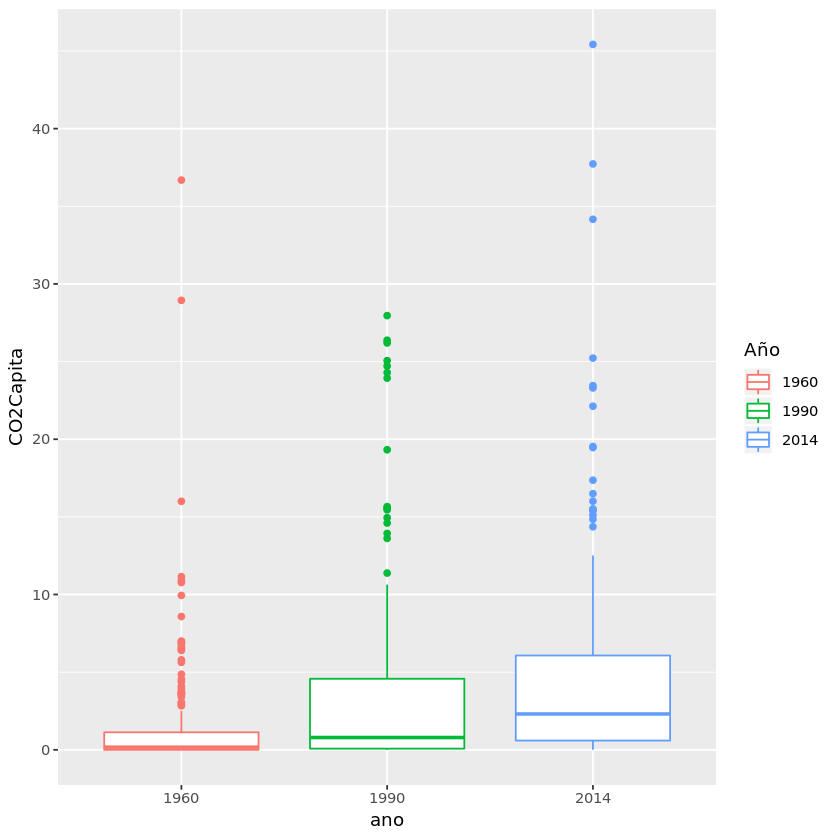

In [44]:
q1<-quantile(X,0.25)
q3<-quantile(X,0.75)
iqr<-q3-q1
names(iqr)<-"iqr"
q1
q3
iqr

ggplot(data=dataframe_indicator_merged,aes(x=ano, y=CO2Capita,color=ano))+geom_boxplot()+
 scale_color_discrete(name="Año")


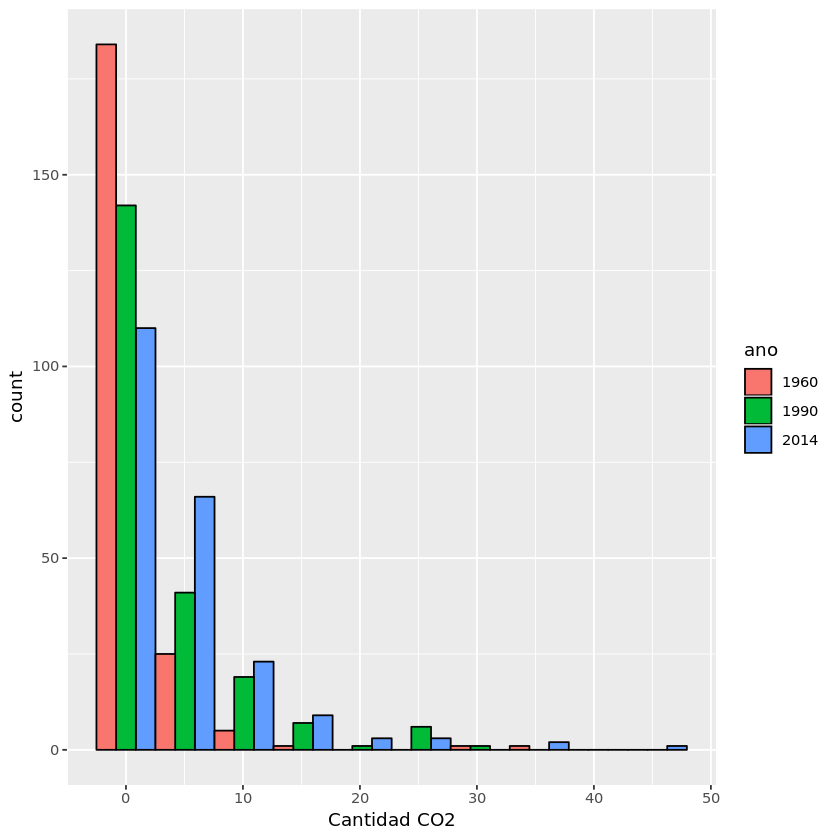

In [56]:
ggplot(data=dataframe_indicator_merged, aes(x=CO2Capita, fill=ano))+
   geom_histogram(bins=10, color="black", position="dodge")+
   xlab("Cantidad CO2")

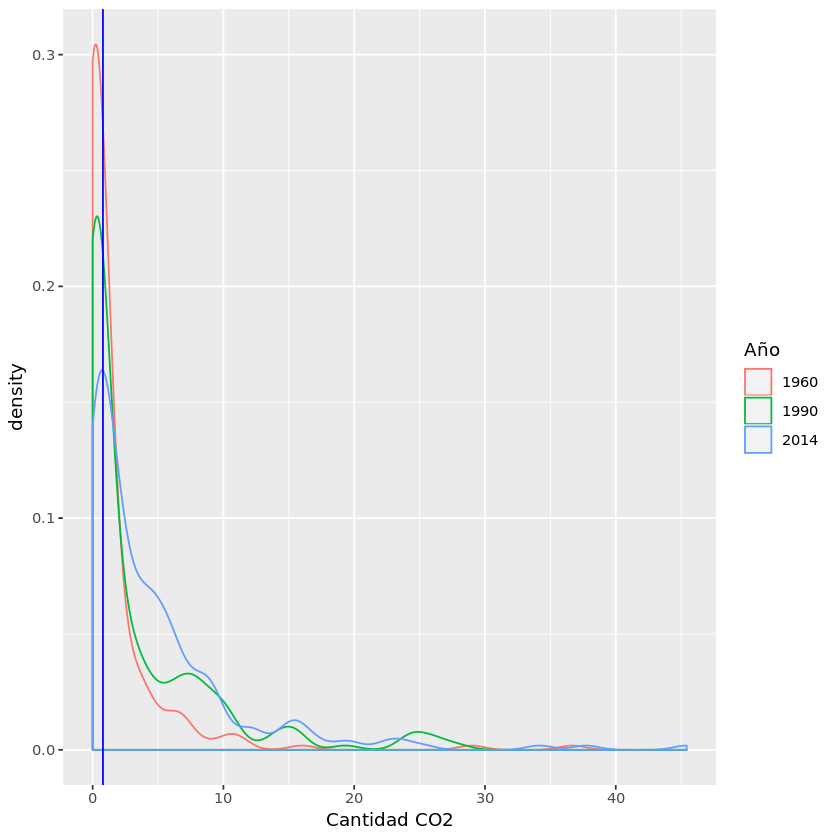

In [73]:
ggplot(data=dataframe_indicator_merged, aes(x=dataframe_indicator_merged$CO2Capita,colour=dataframe_indicator_merged$ano)) + geom_density(bw=1)+
 geom_vline(xintercept=0.79,color="blue")+
scale_colour_discrete(name= "Año")+
xlab("Cantidad CO2")

In [71]:
summary(dataframe_indicator_merged)

  Country_code   CO2Capita            ano           
 ABW    :  3   Min.   : 0.00000   Length:651        
 AFG    :  3   1st Qu.: 0.07524   Class :character  
 AGO    :  3   Median : 0.79849   Mode  :character  
 ALB    :  3   Mean   : 3.17587                     
 AND    :  3   3rd Qu.: 4.10433                     
 ARE    :  3   Max.   :45.42324                     
 (Other):633                                        

- Podemos ver como la tendencia es ir en incremento al largo de los año, tendiendo hacia 10

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2 (clave en Indicator.Code: EN.ATM.CO2E.KT) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

In [47]:
library(MASS)
library(reshape2)

databankCodeMelt <- melt(databank)
head(databankCodeMelt,1)

Using Country.Name, Country.Code, Indicator.Name, Indicator.Code,  as id variables


Country.Name,Country.Code,Indicator.Name,Indicator.Code,,variable,value
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,NA,1960,50.776


In [84]:

selectedCities <- c("WLD","EUU","SSA","NAC","TEA")
databankCodeMeltClean <- subset(databankCodeMelt, Country.Code %in% selectedCities ,)
databankCodeMeltClean[is.na(databankCodeMeltClean)] <- 0
head(databankCodeMeltClean,1)

,Country.Name,Country.Code,Indicator.Name,Indicator.Code,,variable,value
5681,European Union,EUU,Urban population (% of total),SP.URB.TOTL.IN.ZS,0,1960,61.2129


In [86]:
databankCodeMeltClean_filtered <- databankCodeMeltClean[which(databankCodeMeltClean$Indicator.Code == "EN.ATM.CO2E.KT"), c('Country.Code','variable','value')]
colnames(databankCodeMeltClean_filtered)[colnames(databankCodeMeltClean_filtered) == "variable"] <- "ano"
colnames(databankCodeMeltClean_filtered)[colnames(databankCodeMeltClean_filtered) == "value"] <- "CO2Emisiones"
head(databankCodeMeltClean_filtered,1)


,Country.Code,ano,CO2Emisiones
5729,EUU,1960,2359595


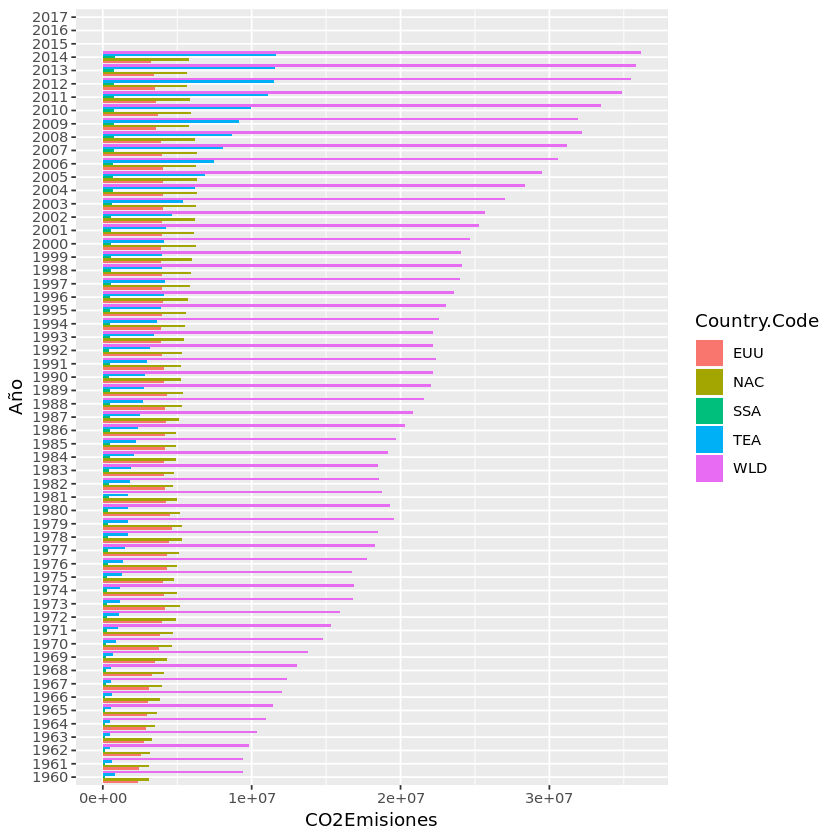

In [108]:
ggplot(data=databankCodeMeltClean_filtered, aes(x=ano, y=CO2Emisiones, fill=Country.Code)) +
geom_bar(stat="identity", position=position_dodge()) +
 coord_flip() +
 xlab("Año")



Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

In [57]:
selectedCities_wrld <- c("WLD")
databankCodeMeltClean_wrld <- subset(databankCodeMelt, Country.Code %in% selectedCities_wrld ,)
databankCodeMeltClean_wrld[is.na(databankCodeMeltClean_wrld)] <- 0

databankCodeMeltClean_wrld <- databankCodeMeltClean_wrld[which(databankCodeMeltClean_wrld$Indicator.Code == "EN.ATM.CO2E.KT"), c('Country.Code','variable','value')]
colnames(databankCodeMeltClean_wrld)[colnames(databankCodeMeltClean_wrld) == "variable"] <- "ano"
colnames(databankCodeMeltClean_wrld)[colnames(databankCodeMeltClean_wrld) == "value"] <- "CO2Emisiones"
databankCodeMeltClean_wrld[is.na(databankCodeMeltClean_wrld)] <-0 
databankCodeMeltClean_wrld$ano <- as.numeric(databankCodeMeltClean_wrld$ano) + 1959
head(databankCodeMeltClean_wrld,1)

,Country.Code,ano,CO2Emisiones
20609,WLD,1960,9396706


In [67]:

model <- lm(data=databankCodeMeltClean_wrld, formula= CO2Emisiones~ano)
summary(model)
databankCodeMeltClean_wrld$predicted <- predict(model, databankCodeMeltClean_wrld)


model_2 <- lm(databankCodeMeltClean_wrld, formula=CO2Emisiones~poly(ano, 3))
summary(model_2)
databankCodeMeltClean_wrld$predicted_2 <- predict(model_2, databankCodeMeltClean_wrld)

model_3 <- lm(databankCodeMeltClean_wrld, formula=CO2Emisiones~poly(ano, 10))
summary(model_3)
databankCodeMeltClean_wrld$predicted_3 <- predict(model_3, databankCodeMeltClean_wrld)




Call:
lm(formula = CO2Emisiones ~ ano, data = databankCodeMeltClean_wrld)

Residuals:
      Min        1Q    Median        3Q       Max 
-28002619   -236060    969062   1644319   8952355 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -521084581  113526548  -4.590 2.55e-05 ***
ano             272230      57090   4.768 1.36e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7279000 on 56 degrees of freedom
Multiple R-squared:  0.2888,	Adjusted R-squared:  0.2761 
F-statistic: 22.74 on 1 and 56 DF,  p-value: 1.364e-05



Call:
lm(formula = CO2Emisiones ~ poly(ano, 3), data = databankCodeMeltClean_wrld)

Residuals:
      Min        1Q    Median        3Q       Max 
-18942885  -2810243   -576091   2612134  15782357 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    20244074     818872  24.722  < 2e-16 ***
poly(ano, 3)1  34707412    6236344   5.565  8.4e-07 ***
poly(ano, 3)2 -21306648    6236344  -3.417  0.00121 ** 
poly(ano, 3)3 -20311718    6236344  -3.257  0.00195 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6236000 on 54 degrees of freedom
Multiple R-squared:  0.4965,	Adjusted R-squared:  0.4686 
F-statistic: 17.75 on 3 and 54 DF,  p-value: 3.83e-08



Call:
lm(formula = CO2Emisiones ~ poly(ano, 10), data = databankCodeMeltClean_wrld)

Residuals:
      Min        1Q    Median        3Q       Max 
-13901967   -685340    -76219    726186  13363452 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      20244074     433416  46.708  < 2e-16 ***
poly(ano, 10)1   34707412    3300799  10.515 6.18e-14 ***
poly(ano, 10)2  -21306648    3300799  -6.455 5.49e-08 ***
poly(ano, 10)3  -20311718    3300799  -6.154 1.58e-07 ***
poly(ano, 10)4  -26495716    3300799  -8.027 2.32e-10 ***
poly(ano, 10)5  -23563647    3300799  -7.139 5.04e-09 ***
poly(ano, 10)6  -13653731    3300799  -4.136 0.000145 ***
poly(ano, 10)7   -7239467    3300799  -2.193 0.033272 *  
poly(ano, 10)8     857231    3300799   0.260 0.796226    
poly(ano, 10)9    6262006    3300799   1.897 0.063966 .  
poly(ano, 10)10   7213801    3300799   2.185 0.033872 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard erro

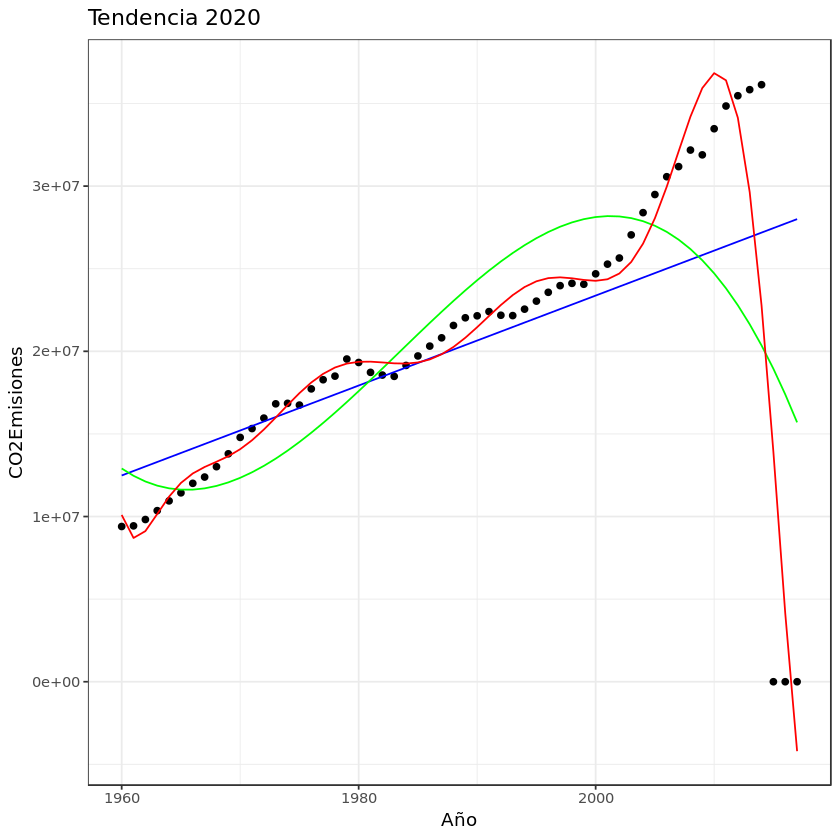

In [69]:
ggplot(data=databankCodeMeltClean_wrld,aes(x=ano))+
   geom_point(aes(y=CO2Emisiones))+
   geom_line(aes(y=predicted),color="blue")+
    geom_line(aes(y=predicted_2),color="green")+
geom_line(aes(y=predicted_3),color="red")+
   theme_bw()+xlab("Año")+ylab("CO2Emisiones")+ggtitle("Tendencia 2020")

- Podemos ver como en el polinomio de grado 10 la R-squared es la más próxima a 1, por lo que es el modelo que mejor sigue la distribución

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [1]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [12]:
# Agregamos y calculamos el nivel de CO2 medio anual
yearlyco2ppm<-aggregate(interpolated ~ year, data = co2ppm, mean)
head(yearlyco2ppm,10)

year,interpolated
1958,315.1889
1959,315.9742
1960,316.9075
1961,317.6375
1962,318.4508
1963,318.9942
1964,319.6175
1965,320.0442
1966,321.3833
1967,322.1575


In [13]:
library(MASS)
library(reshape2)

databankCodeMelt <- melt(databank)
databankCodeMeltWLD <- databankCodeMelt[which(databankCodeMelt$Indicator.Code == "EN.ATM.CO2E.KT" & 
                                              databankCodeMelt$Country.Code == "WLD"), c('variable','value')]
databankCodeMeltWLD[is.na(databankCodeMeltWLD)] <- 0
colnames(databankCodeMeltWLD)[colnames(databankCodeMeltWLD) == "variable"] <- "year"
colnames(databankCodeMeltWLD)[colnames(databankCodeMeltWLD) == "value"] <- "CO2Emisiones"
head(databankCodeMeltWLD,1)

Using Country.Name, Country.Code, Indicator.Name, Indicator.Code,  as id variables


,year,CO2Emisiones
20609,1960,9396706


In [15]:
databankCodeMeltWLDMerged <- merge(databankCodeMeltWLD,yearlyco2ppm, by='year')
head(databankCodeMeltWLDMerged,1)

year,CO2Emisiones,interpolated
1960,9396706,316.9075


In [26]:
databankCodeMeltWLDMerged$year <- as.numeric(databankCodeMeltWLDMerged$year) + 1969
summary(databankCodeMeltWLDMerged) 
head(databankCodeMeltWLDMerged,10)

      year       CO2Emisiones       interpolated  
 Min.   :1970   Min.   :       0   Min.   :316.9  
 1st Qu.:1984   1st Qu.:15481680   1st Qu.:330.4  
 Median :1998   Median :20017299   Median :352.3  
 Mean   :1998   Mean   :20244074   Mean   :354.1  
 3rd Qu.:2013   3rd Qu.:24545981   3rd Qu.:375.2  
 Max.   :2027   Max.   :36138285   Max.   :406.5  

year,CO2Emisiones,interpolated
1970,9396706,316.9075
1971,9434403,317.6375
1972,9818840,318.4508
1973,10355747,318.9942
1974,10947007,319.6175
1975,11433442,320.0442
1976,12009447,321.3833
1977,12389686,322.1575
1978,13017194,323.0450
1979,13797117,324.6242


In [27]:
cr1<-cor(databankCodeMeltWLDMerged$CO2Emisiones,databankCodeMeltWLDMerged$interpolated)
cr2<-cor(databankCodeMeltWLDMerged$year,databankCodeMeltWLDMerged$interpolated)
cr3<-cor(databankCodeMeltWLDMerged$year,databankCodeMeltWLDMerged$CO2Emisiones)
paste0("La correlación de las variables año,CO2 medio es:",round(cr2,2))
paste0("La correlación de las variables año,CO2 global es:",round(cr3,2))
paste0("La correlación de las variables CO2 medio en la atmosfera,CO2 emitido por los paises es:",round(cr1,2))

[1] "La correlación de las variables año,CO2 medio es:0.99"

[1] "La correlación de las variables año,CO2 global es:0.54"

[1] "La correlación de las variables CO2 medio en la atmosfera,CO2 emitido por los paises es:0.49"

- Podemos ver como si va aumentando las emisiones el interpolado también aumenta


Call:
lm(formula = interpolated ~ CO2Emisiones, data = databankCodeMeltWLDMerged)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.729 -18.653  -4.145  10.988  83.178 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.233e+02  7.966e+00  40.593   <2e-16 ***
CO2Emisiones 1.520e-06  3.629e-07   4.189    1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.44 on 56 degrees of freedom
Multiple R-squared:  0.2386,	Adjusted R-squared:  0.225 
F-statistic: 17.55 on 1 and 56 DF,  p-value: 0.0001002



Call:
lm(formula = interpolated ~ year, data = databankCodeMeltWLDMerged)

Residuals:
   Min     1Q Median     3Q    Max 
-4.071 -2.434 -1.134  2.010  7.791 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.774e+03  5.068e+01  -54.74   <2e-16 ***
year         1.565e+00  2.536e-02   61.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.233 on 56 degrees of freedom
Multiple R-squared:  0.9855,	Adjusted R-squared:  0.9853 
F-statistic:  3811 on 1 and 56 DF,  p-value: < 2.2e-16



Call:
lm(formula = CO2Emisiones ~ year, data = databankCodeMeltWLDMerged)

Residuals:
      Min        1Q    Median        3Q       Max 
-28002619   -236060    969062   1644319   8952355 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -523806877  114097423  -4.591 2.54e-05 ***
year            272230      57090   4.768 1.36e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7279000 on 56 degrees of freedom
Multiple R-squared:  0.2888,	Adjusted R-squared:  0.2761 
F-statistic: 22.74 on 1 and 56 DF,  p-value: 1.364e-05


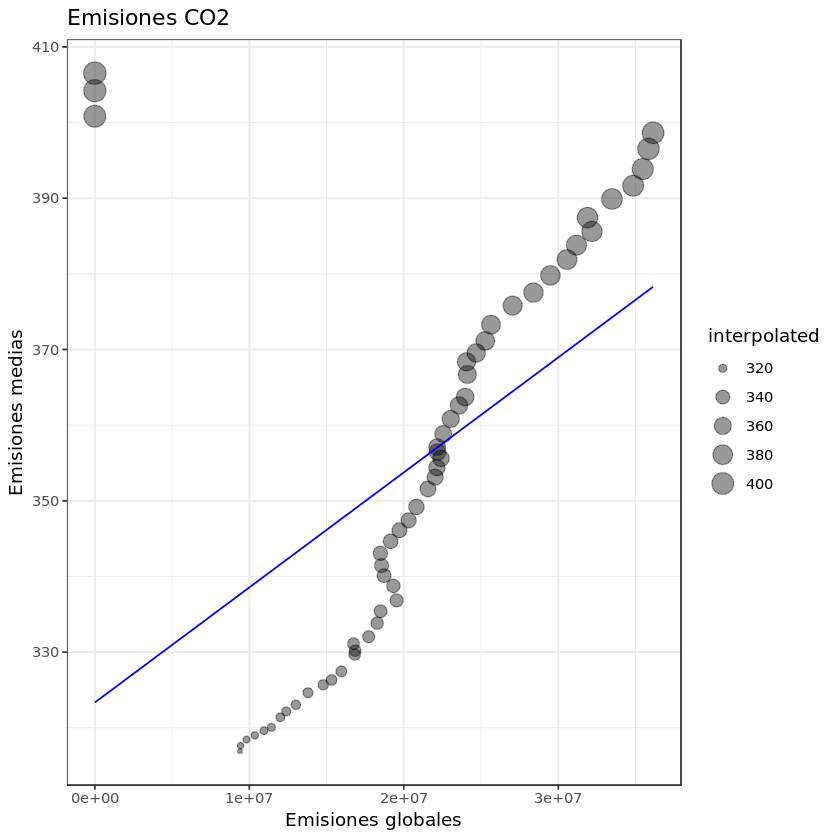

In [33]:
model <- lm(data=databankCodeMeltWLDMerged, formula=interpolated~CO2Emisiones)
summary(model)
databankCodeMeltWLDMerged$predicted <- predict(model, databankCodeMeltWLDMerged)

model_2 <- lm(data=databankCodeMeltWLDMerged, formula=interpolated~year)
summary(model_2)
databankCodeMeltWLDMerged$predicted_int <- predict(model_2, databankCodeMeltWLDMerged)

model_3 <- lm(data=databankCodeMeltWLDMerged, formula=CO2Emisiones~year)
summary(model_3)
databankCodeMeltWLDMerged$predicted_ems <- predict(model_3, databankCodeMeltWLDMerged)

ggplot(data=databankCodeMeltWLDMerged, aes(x=CO2Emisiones))+
 geom_point(aes(y=interpolated, size=interpolated),alpha=0.4)+
 geom_line(aes(y=predicted),color="blue")+
 theme_bw()+xlab("Emisiones globales")+ylab("Emisiones medias")+ggtitle("Emisiones CO2")

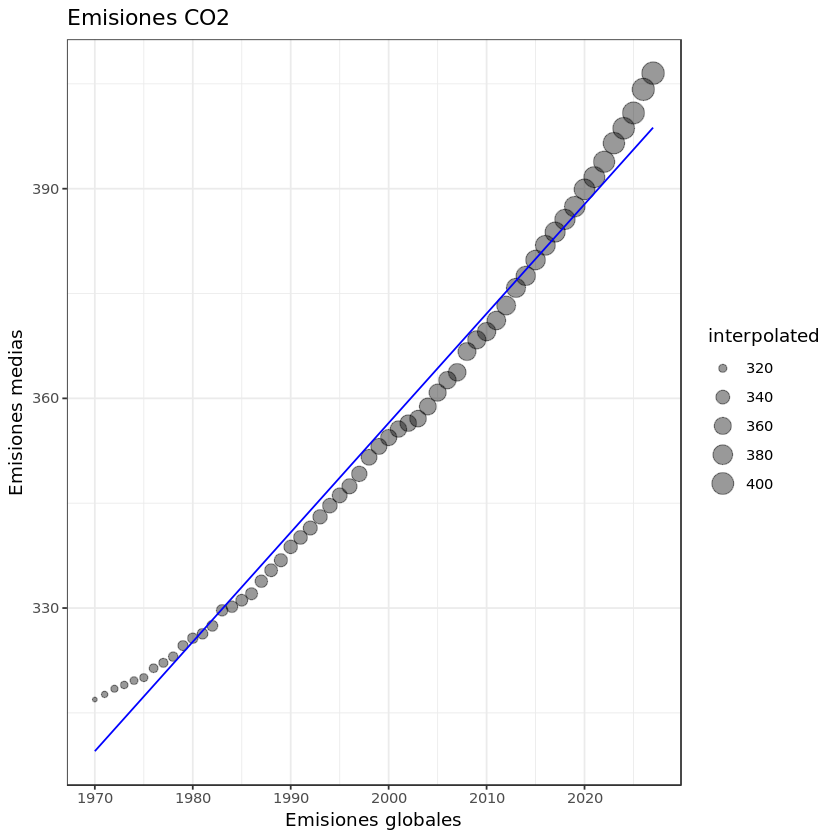

In [34]:
ggplot(data=databankCodeMeltWLDMerged, aes(x=year))+
geom_point(aes(y=interpolated, size=interpolated),alpha=0.4)+
geom_line(aes(y=predicted_int),color="blue")+
 theme_bw()+xlab("Emisiones globales")+ylab("Emisiones medias")+ggtitle("Emisiones CO2")

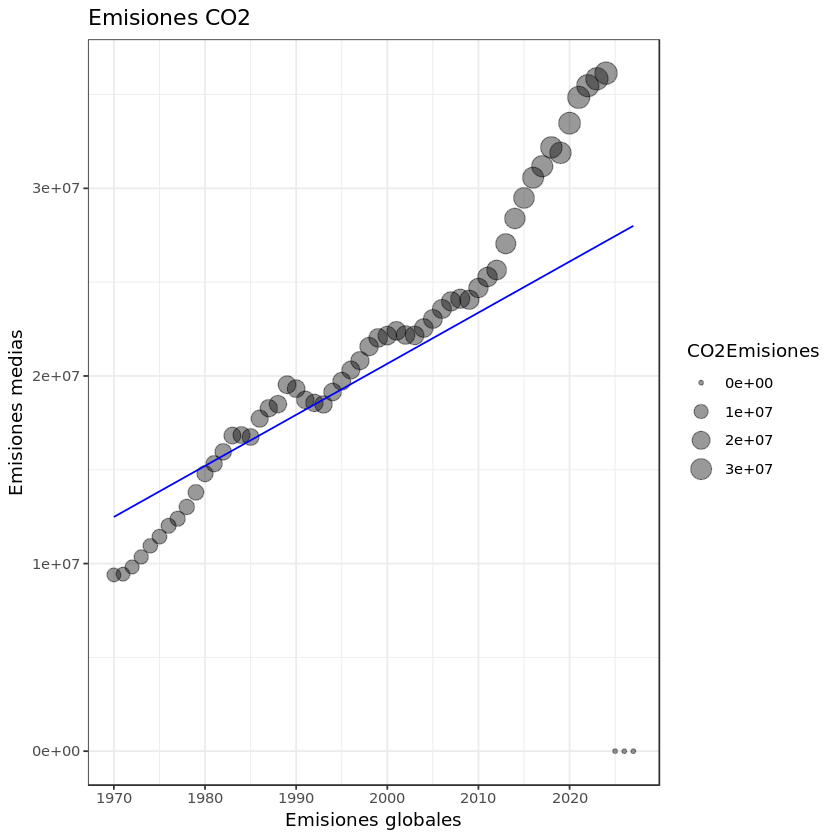

In [35]:
ggplot(data=databankCodeMeltWLDMerged, aes(x=year))+
geom_point(aes(y=CO2Emisiones, size=CO2Emisiones),alpha=0.4)+
geom_line(aes(y=predicted_ems),color="blue")+
 theme_bw()+xlab("Emisiones globales")+ylab("Emisiones medias")+ggtitle("Emisiones CO2")

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [38]:
head(databankCodeMeltWLDMerged,10)

year,CO2Emisiones,interpolated,predicted,predicted_int,predicted_ems
1970,9396706,316.9075,337.6361,309.5181,12485529
1971,9434403,317.6375,337.6934,311.0834,12757758
1972,9818840,318.4508,338.2778,312.6486,13029988
1973,10355747,318.9942,339.0941,314.2139,13302218
1974,10947007,319.6175,339.9930,315.7791,13574447
1975,11433442,320.0442,340.7326,317.3444,13846677
1976,12009447,321.3833,341.6083,318.9096,14118907
1977,12389686,322.1575,342.1864,320.4749,14391136
1978,13017194,323.0450,343.1404,322.0401,14663366
1979,13797117,324.6242,344.3262,323.6054,14935596


In [40]:
head(weatherPraga,1)

STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
EZE00100082,1775,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",246.3,NA,246.3,E,⋯,NA,,NA,,10.55,E,13.64,E,7.46,E


In [45]:
databankCodeMeltWLDMergedDF <- databankCodeMeltWLDMerged[c("year","CO2Emisiones","interpolated")]
weatherPragaDF <- weatherPraga[c("DATE","EMNT")]
colnames(weatherPragaDF)[colnames(weatherPragaDF) == "DATE"] <- "year"
weatherPragaDFMerged <- merge(databankCodeMeltWLDMergedDF, weatherPragaDF, by="year")
head(weatherPragaDFMerged,1)

year,CO2Emisiones,interpolated,EMNT
1970,9396706,316.9075,-11.5


In [71]:
weather.cor <- cor(weatherPragaDFMerged[2:ncol(weatherPragaDFMerged)],use="complete.obs")
weather.cor

,CO2Emisiones,interpolated,EMNT
CO2Emisiones,1.0000000,0.957241199,-0.078817699
interpolated,0.9572412,1.000000000,-0.009526842
EMNT,-0.0788177,-0.009526842,1.000000000


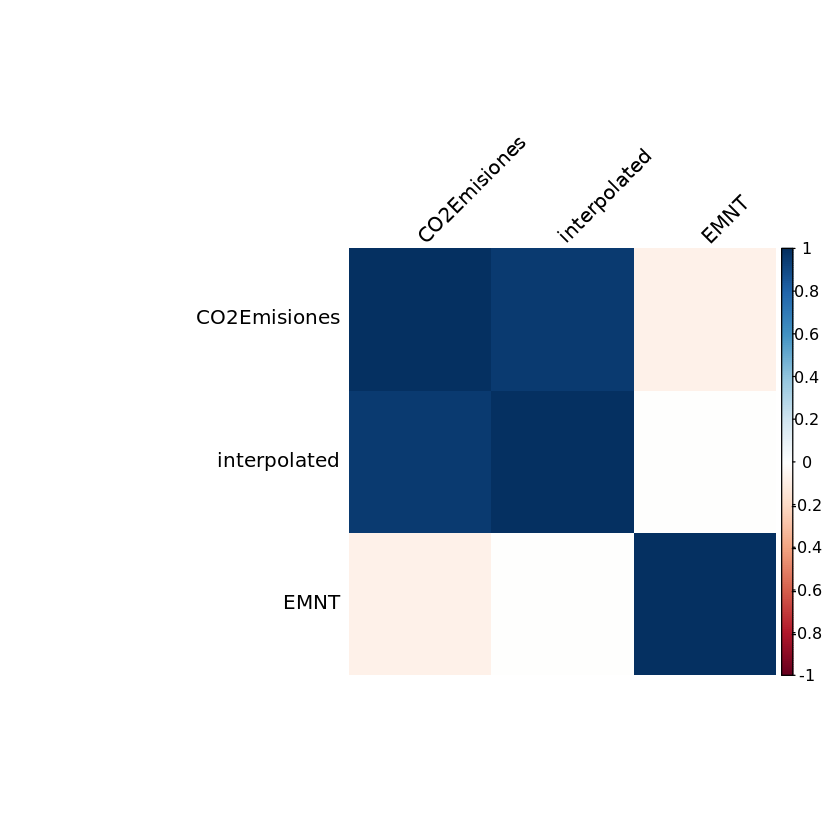

In [76]:
library(corrplot)
corrplot(weather.cor, method = "shade", shade.col = NA,
         tl.col = "black", tl.srt = 45)

- Podemos ver como entre cantidad de CO2 media y la total tiene una alta correlacion pero entre temperaturas minimas y emisiones de CO2 no hay apenas correlacion